<a href="https://colab.research.google.com/github/jonni9/AnaliseBrasileirao_2003_2018/blob/main/Brasileirao2003_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importante nota antes de começar:** 
A análise inclui apenas a Série A do Campeonato Brasileiro por pontos corridos **(de 2003 a 2018)**

---



In [3]:
#importando biblioteca pandas
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt


In [6]:
#importando arquivo csv
df = pd.read_csv("/content/drive/MyDrive/Datasets/dados-brasileirao-2003-a-2018.csv", sep='	')

In [7]:
#Definindo o estilo de gráfico
plt.style.use("ggplot")

In [8]:
pontuacao = df.groupby('Clb')['Pts'].sum()

In [9]:
#Ultimo ano registrado
mandantes = df.loc[df["Home"] == True]
visitantes = df.loc[df["Home"] == False]

In [10]:
#Convertendo os dados em Boolean
df["Vit"] = df["Vit"].astype('boolean')
df["Emp"] = df["Emp"].astype('boolean')
df["Der"] = df["Der"].astype('boolean')

In [11]:
#cabeçalho dos dados
df.head()

,Ano,Rod,Pos,Clb,Pts,Vit,Emp,Der,GP,GC,SG,Adv,Home,Pts(ac),Vit(ac),Emp(ac),Der(ac),GP(ac),GC(ac),SG(ac)
0,2003,1,1,Athletico-PR,3,True,False,False,2,0,2,Gremio,True,3,1,0,0,2,0,2
1,2003,1,2,Atletico-MG,3,True,False,False,3,0,3,Corinthians,False,3,1,0,0,3,0,3
2,2003,1,5,Bahia,1,False,True,False,0,0,0,Fortaleza,False,1,0,1,0,0,0,0
3,2003,1,21,Corinthians,0,False,False,True,0,3,-3,Atletico-MG,True,0,0,0,1,0,3,-3
4,2003,1,6,Coritiba,1,False,True,False,1,1,0,Flamengo,False,1,0,1,0,1,1,0


In [12]:
ultima_Rodada = df.loc[df['Rod'] == 38]

In [13]:
campeao = ultima_Rodada.loc[df['Pos'] == 1]



---

# O gráfico a baixo ilustra a pontuação com a qual cada campeão terminou o campeonato.

---



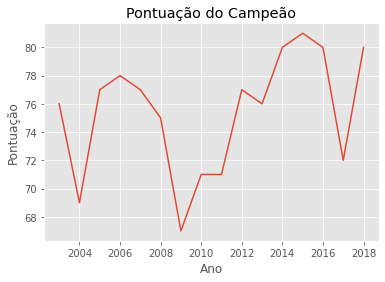

In [14]:
#Gráfico ilustrando a pontuação total de cada campeão por ano
campeao.groupby("Ano")["Pts(ac)"].sum().plot(title="Pontuação do Campeão")
plt.xlabel("Ano")
plt.ylabel("Pontuação");



---


# **Pontuação de cada time campeão:**

In [25]:
campeao.groupby(['Clb', 'Ano'])['Pts(ac)'].sum()

Clb          Ano 
Corinthians  2005    77
             2011    71
             2015    81
             2017    72
Cruzeiro     2003    76
             2013    76
             2014    80
Flamengo     2009    67
Fluminense   2010    71
             2012    77
Palmeiras    2016    80
             2018    80
Santos       2004    69
Sao-Paulo    2006    78
             2007    77
             2008    75
Name: Pts(ac), dtype: int64



---

**A pontuação média para ser campeãao é de aproximadamente 75 pontos**

---



In [ ]:
#Média de pontos necessários para ser campeão
media_do_campeao = campeao['Pts(ac)'].mean()
display(media_do_campeao)

In [ ]:
#Média de gols dos campeões
campeao["GP(ac)"].mean()



---
# **O campeão com menor pontuação terminou com 67 pontos conquistados.**

---




In [ ]:
campeao['Pts(ac)'].min()



---

# **O gráfico a seguir ilustra o total de gols marcados e sofridos pelo campeão ao fim do campeonato.**

---



In [ ]:
from matplotlib import colorbar
#Total de Gols marcados e sofridos pelo campeão do ano
campeao.groupby("Ano")["GC(ac)"].sum().plot(title="Total de Gols Marcados Pelo Campeão")
campeao.groupby("Ano")["GP(ac)"].sum().plot()
plt.xlabel("Ano")
plt.ylabel("Total de gols")
plt.legend(["Gols Contra","Gols-Pró"]);

 ---
# **O gráfico a seguir ilustra a pontuação média conquistada pelo mandante e visitante por jogo a cada ano.**

---



In [ ]:
#Gráficos ilustrando a pontuação média do mandante e visitante por jogo
mandantes.groupby('Ano')['Pts'].mean().plot(title="Pontuação Média Mandante/Visitante")
visitantes.groupby('Ano')['Pts'].mean().plot()
plt.xlabel("Anos")
plt.ylabel("Média de Pontos/Jogo")
plt.legend(["Mandantes", "Visitantes"]);

# **O gráfico a seguir ilustra a média de gols marcados pelo mandante/visitante por jogo a cada ano**

In [ ]:
#Gráfico para ilustrar a Média de Gols do Mandante e Visitante
mandantes.groupby('Ano')['GP'].mean().plot(title="Média de Gols do Mandante/Visitante Por Jogo")
visitantes.groupby('Ano')['GP'].mean().plot()
plt.xlabel("Anos")
plt.ylabel("Média de Gols/Jogo")
plt.legend(["Mandantes", "Visitantes"]);

In [ ]:
anos = df.groupby("Ano")

# **O gráfico a seguir ilustra o total de gols marcados no campeonato por ano**

In [ ]:
#Gráfico com o total de gols por ano
anos["GP"].sum().plot(title="Total de gols por ano")
plt.xlabel("Anos")
plt.ylabel("Total de Gols/Ano");
plt.savefig("Grafico_Total_Gols_Anos.png")

# **Essa seria a classificação de somássemos todos os pontos conquistados por cada clube desde 2003 até o ano de 2018**

In [ ]:
#classificação com total de pontos conquistados por time
pontuacao.sort_values(ascending=False)